In [2]:
import pandas as pd
from sklearn.metrics import r2_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBRegressor
from utils.metrics import partsMetrics,allMetrics
from utils.plots import exp_vs_predict

In [3]:
df=pd.read_csv('processed_outliers.csv')
print('Data shape:',df.shape)

Data shape: (519, 7)


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(519, 6)
(519,)


In [4]:
param_grid={
    'n_estimators': [None,10,50,200,300],   #default=100
    'max_depth': [None,2,6,10,20],
    'max_leaves': [None,10,20],
    'learning_rate': [None,.5,1],
    'subsample': [None,.5,.8],
    'reg_lambda': [None,.1,1,10,100],
    # 'reg_alpha': [None,.01,.1,1],
    'colsample_bytree': [None,.2,.5,.8],
    'gamma': [None,.1,.5,1],
    # 'min_child_weight': [None,.1,.5,1,2,4]    #default=1
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def train_model(X_train,y_train):
    reg = XGBRegressor(random_state=0,n_jobs=2)
    grid=GridSearchCV(reg,param_grid,cv=5,scoring=make_scorer(r2_score),n_jobs=2)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    return grid

In [10]:
model=train_model(X_train,y_train)

{'colsample_bytree': 0.8, 'gamma': None, 'learning_rate': None, 'max_depth': 10, 'max_leaves': 20, 'n_estimators': 300, 'reg_lambda': 10, 'subsample': None}
0.958077240078941


In [5]:
best_params={'colsample_bytree': 0.8, 'gamma': None, 'learning_rate': None, 'max_depth': 10, 'max_leaves': 20, 'n_estimators': 300, 'reg_lambda': 10, 'subsample': None}
reg=XGBRegressor(**best_params,random_state=0,n_jobs=2)
partsMetrics(df,reg)

train rmse: 0.36656284298241903
val rmse: 2.2497904473643304
test rmse: 1.657026329067313

train si: 0.029886824964084624
val si: 0.1835607169970029
test si: 0.11907050246873525

train r2: 0.9990951870912265
val r2: 0.9695360599360108
test r2: 0.9866103500747814

train mape: 9.950715757106375
val mape: 65.3212955812951
test mape: 76.61087207324148


In [6]:
allMetrics(df,reg)

all rmse: 0.3946320932849195
all si: 0.03175113086234885
all r2: 0.999011919121039
all mape: 11.621337712055245


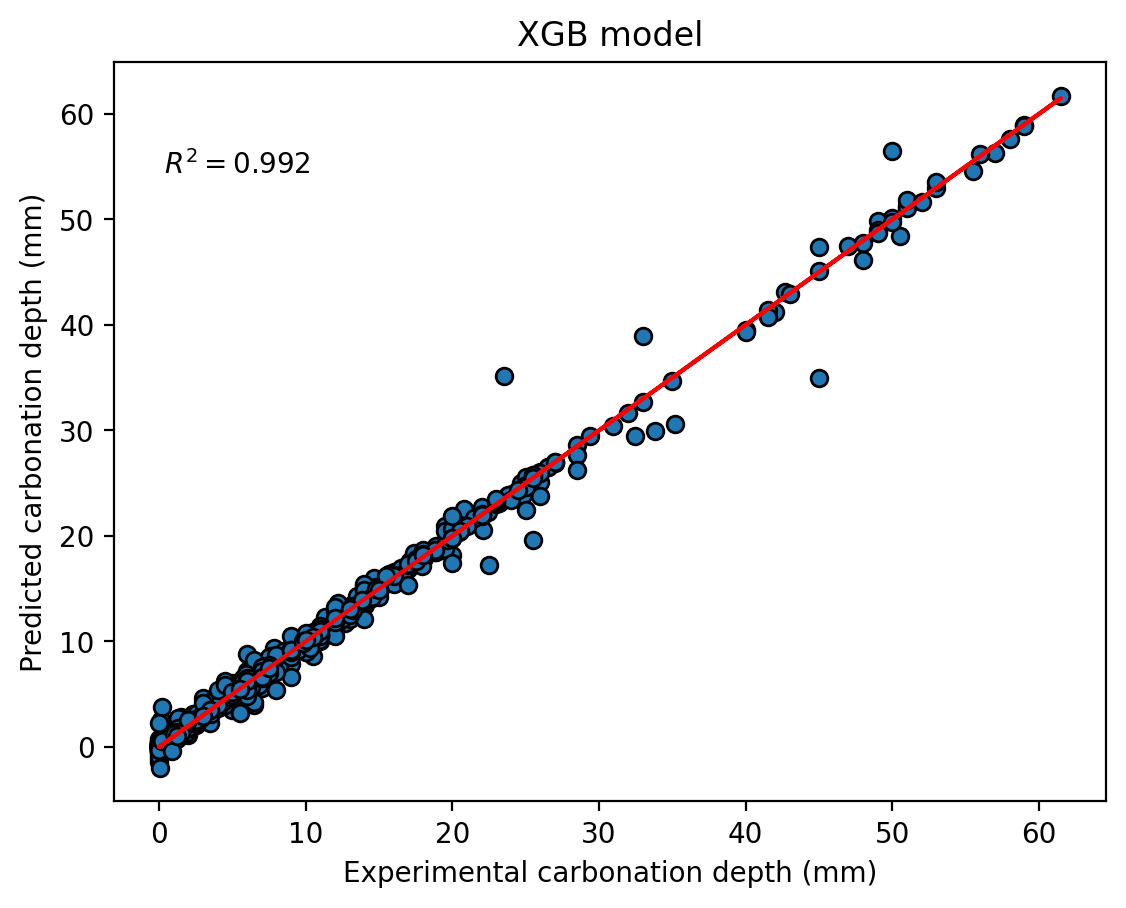

In [7]:
exp_vs_predict(df,reg,'XGB model')